## Vignetting Demo

This notebook demonstrates the adjustment of limiting magnitude at the object position to account for vignetting.

In [1]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from sorcha.modules.PPVignetting import vignettingEffects

We begin by loading in a set of randomised artificial observations which were all generated to lie on the same field, within 2.1 degrees of field centre. To begin with, these observations all have the same five sigma depth at source, or limiting magnitude.

In [3]:
def get_sql_data(database, rows_start, nrows):
    
    con = sql.connect(database)
    observations = pd.read_sql("""SELECT observationId, observationStartMJD as observationStartMJD_TAI, visitTime, visitExposureTime, filter, seeingFwhmGeom as seeingFwhmGeom_arcsec, seeingFwhmEff as seeingFwhmEff_arcsec, fiveSigmaDepth as fieldFiveSigmaDepth_mag, fieldRA as fieldRA_deg, fieldDec as fieldDec_deg, rotSkyPos as fieldRotSkyPos_deg FROM observations order by observationId LIMIT """ + str(rows_start) + ',' + str(nrows), con)
    
    return observations

In [4]:
db_path = "oneline_v2.0.db"
LSSTdf = get_sql_data(db_path, 0,1)

In [5]:
dfobs = pd.read_csv("footprintFilterValidationObservations.csv", sep='\s+')

In [6]:
dfobs = pd.merge(dfobs, LSSTdf, left_on="FieldID", right_on="observationId", how="left")

In [7]:
dfobs

,ObjID,FieldID,fieldMJD_TAI,Range_LTC_km,RangeRate_LTC_km_s,RA_deg,RARateCosDec_deg_day,Dec_deg,DecRate_deg_day,Obj_Sun_x_LTC_km,...,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg
0,S0000w6ca,402942.0,60945.035513,344266000.0,9.645862,273.950475,0.145419,-25.409570,-0.034414,171050400.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
1,S0000wkZa,402942.0,60945.035513,93728970.0,24.810874,273.029493,1.592210,-24.398177,-0.243588,154138100.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
2,S0000wspa,402942.0,60945.035513,330569600.0,21.915557,274.480023,0.072605,-25.283050,0.093505,172974700.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
3,S0000wUea,402942.0,60945.035513,492613400.0,25.078801,273.646543,0.109090,-25.456436,0.005462,177915900.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
4,S0000xl3a,402942.0,60945.035513,200278800.0,30.796080,271.853254,0.734379,-23.453650,-0.003425,155568800.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29051,mpc00K8271,402942.0,60945.035513,360725700.0,20.617454,272.594036,0.244908,-25.480627,0.015066,164365000.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
29052,mpc00K9056,402942.0,60945.035513,261587100.0,16.465273,272.172454,0.412457,-25.517282,0.032230,158575700.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
29053,mpc00K9551,402942.0,60945.035513,298658200.0,16.740250,274.477149,0.288844,-26.376947,0.009252,170513400.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
29054,mpc00K9617,402942.0,60945.035513,371087000.0,21.670828,272.019401,0.241333,-24.188684,0.022293,161555100.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823


In [8]:
dfobs['fieldFiveSigmaDepth_mag']

0        24.071162
1        24.071162
2        24.071162
3        24.071162
4        24.071162
           ...    
29051    24.071162
29052    24.071162
29053    24.071162
29054    24.071162
29055    24.071162
Name: fieldFiveSigmaDepth_mag, Length: 29056, dtype: float64

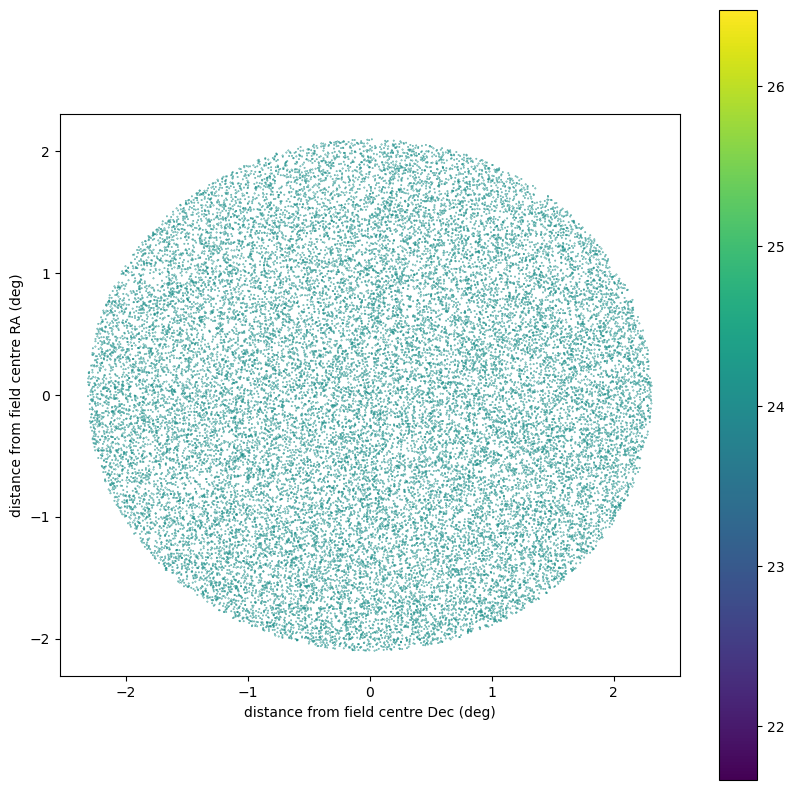

In [9]:
fig, ax = plt.subplots(1, figsize=(10,10))
sc=ax.scatter(dfobs['fieldRA_deg']-dfobs['RA_deg'],dfobs['fieldDec_deg']-dfobs['Dec_deg'], s=0.1, c=dfobs['fieldFiveSigmaDepth_mag'].values)
ax.set_ylabel('distance from field centre RA (deg)')
ax.set_xlabel('distance from field centre Dec (deg)')
ax.set_aspect('equal', adjustable='box')
fig.colorbar(sc, ax=ax)
plt.show()

In the above plot, the points have been shaded according to their limiting magnitude.

Now we apply the effects of vignetting and replot. 

In [10]:
dfobs['fiveSigmaDepth_mag'] = vignettingEffects(dfobs)

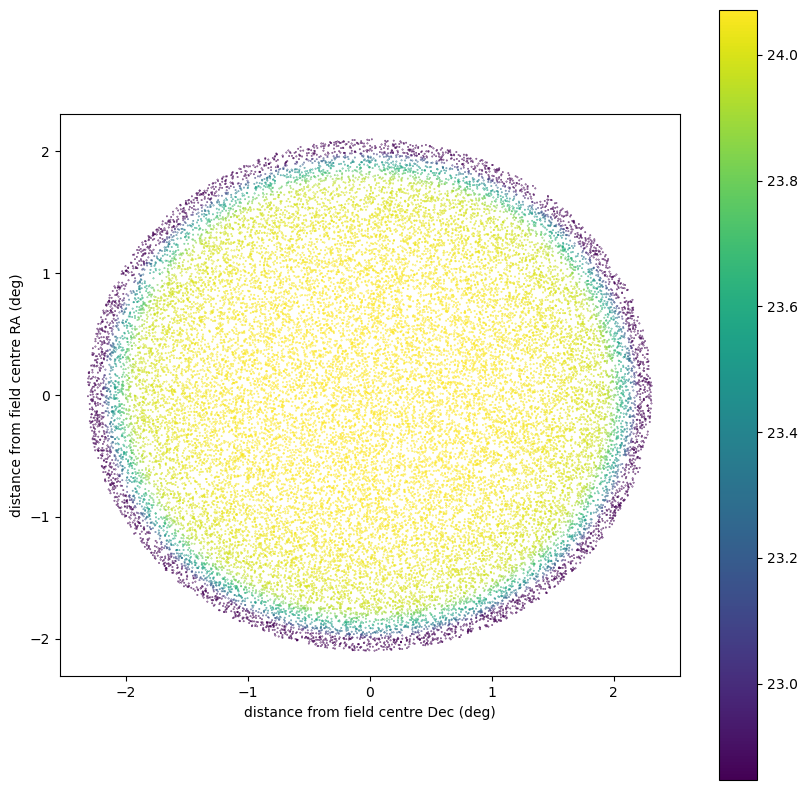

In [11]:
fig, ax = plt.subplots(1, figsize=(10,10))
sc=ax.scatter(dfobs['fieldRA_deg']-dfobs['RA_deg'],dfobs['fieldDec_deg']-dfobs['Dec_deg'], s=0.1, c=dfobs['fiveSigmaDepth_mag'].values)
ax.set_ylabel('distance from field centre RA (deg)')
ax.set_xlabel('distance from field centre Dec (deg)')
fig.colorbar(sc, ax=ax)
ax.set_aspect('equal', adjustable='box')
plt.show()

The effects of vignetting can thus be seen.